In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG
from classes.plotter import BasicOpticalGatingPlotter as BOGP
from classes.drawer import Drawer

In [2]:
import copy
import numpy as np
import matplotlib.pyplot as plt

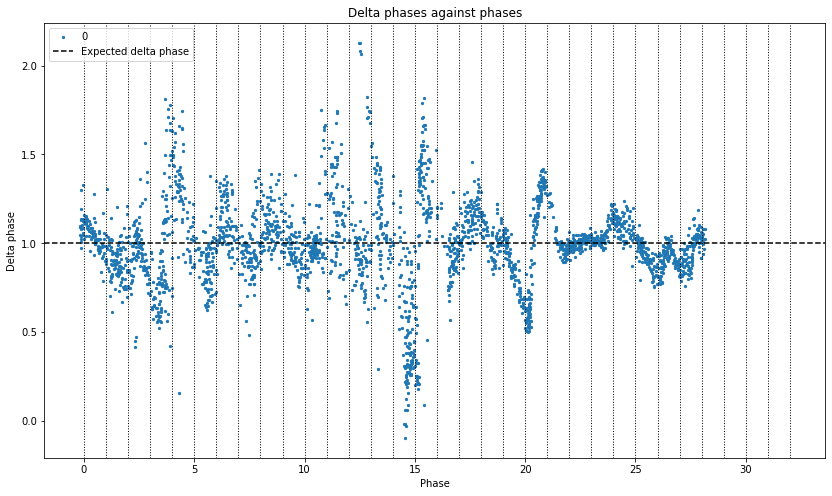

In [11]:
from classes.basic_optical_gating import LinearExpansion as BOGL

sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

sequence = "D:/Downloads/Archive/seq.tif"
reference_sequence = "D:/Downloads/Archive/ref_seq.tif"
reference_sequence_period = 2.835414623487623942e+01

og = BOG()
og.logger.set_quiet()
og.settings["drift_correction"] = True
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
#og.get_bias_correction()
og.run()

from classes.basic_optical_gating import AdaptedV as BOGV
og_bc = BOGV()
og_bc.logger.set_quiet()
og_bc.set_sequence(sequence)
og_bc.set_reference_sequence(reference_sequence)
og_bc.set_reference_period(reference_sequence_period)
og_bc.run()

bog = BOGP([og])
bog.plot_delta_phases_phases()

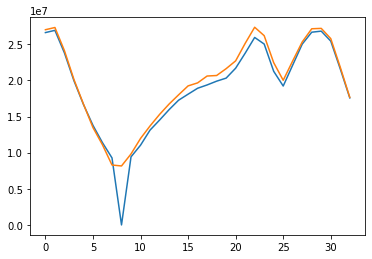

In [25]:
plt.plot(og.sads[22])
plt.plot(og.sads[50])

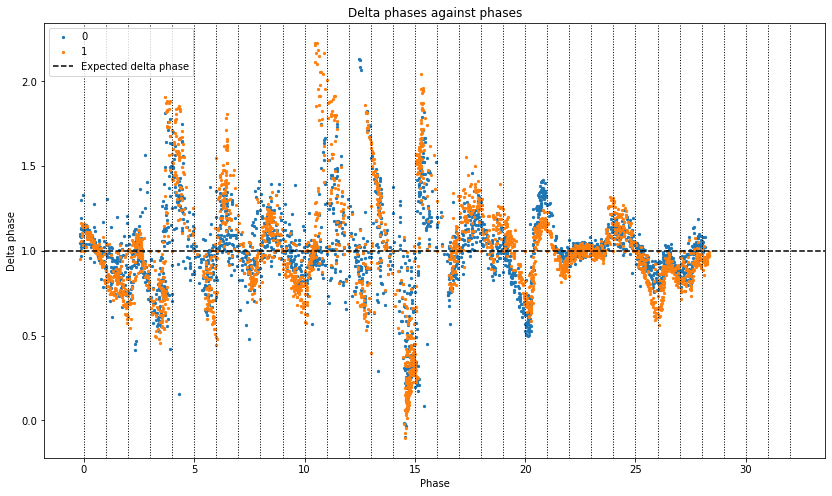

In [12]:
bog = BOGP([og, og_bc])
bog.plot_delta_phases_phases()

In [4]:
sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

og = BOG()
og.logger.set_quiet()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run()

from classes.basic_optical_gating import AdaptedV as BOGV
from classes.basic_optical_gating import QuadraticModel as BOGQ

og_bc = BOGQ()
og_bc.logger.set_quiet()
og_bc.set_sequence(sequence)
og_bc.set_reference_sequence(reference_sequence)
og_bc.set_reference_period(reference_sequence_period)
og_bc.run()


c:\Users\kross\anaconda3\envs\open-optical-gating\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


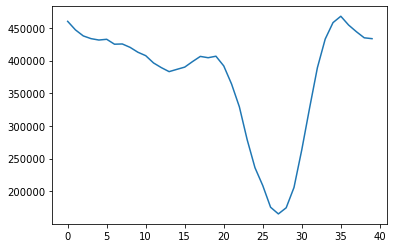

In [5]:
plt.plot(og_bc.sads[0])
plt.show()

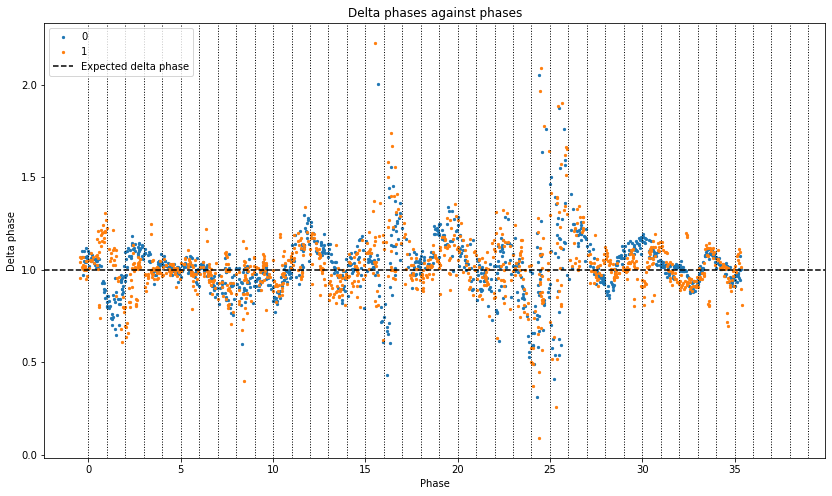

In [6]:
bogp = BOGP([og, og_bc])
bogp.plot_delta_phases_phases()

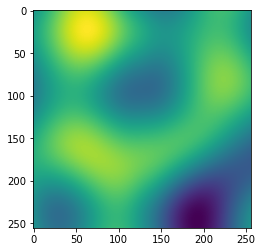

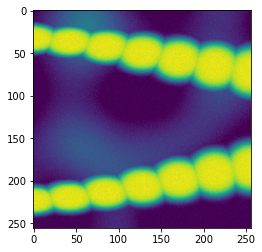

In [7]:
from classes.drawer import Peristalsis

v = Peristalsis(15, 39.1, (256, 256))
v.generate_reference_sequence()
v.generate_sequence()

In [8]:
import tifffile as tf
tf.imwrite("test.tif", v.sequence)

In [9]:
sog = BOG()
sog.logger.set_quiet()
sog.set_reference_period(v.reference_period)
sog.set_reference_sequence(v.reference_sequence)
sog.set_sequence(v.sequence)
sog.run()

sog_bc = BOGV()
sog_bc.logger.set_quiet()
sog_bc.set_reference_period(v.reference_period)
sog_bc.set_reference_sequence(v.reference_sequence)
sog_bc.set_sequence(v.sequence)
sog_bc.run()

sog_Q = BOGQ()
sog_Q.logger.set_quiet()
sog_Q.set_reference_period(v.reference_period)
sog_Q.set_reference_sequence(v.reference_sequence)
sog_Q.set_sequence(v.sequence)
sog_Q.run()

sog_V = BOGV()
sog_V.logger.set_quiet()
sog_V.set_reference_period(v.reference_period)
sog_V.set_reference_sequence(v.reference_sequence)
sog_V.set_sequence(v.sequence)
sog_V.run()

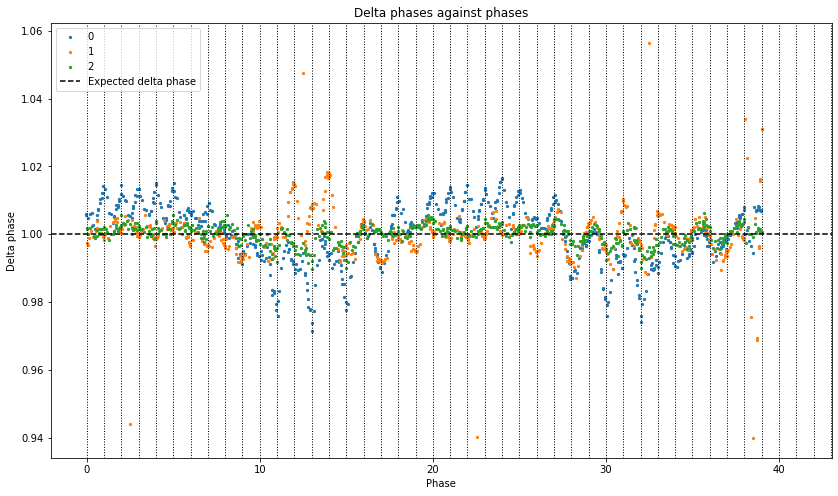

In [10]:
bogp = BOGP([sog, sog_Q, sog_V])
bogp.plot_delta_phases_phases()